In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt


In [100]:
data_1 = pd.read_csv('train.csv')

data_1.head()

In [101]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


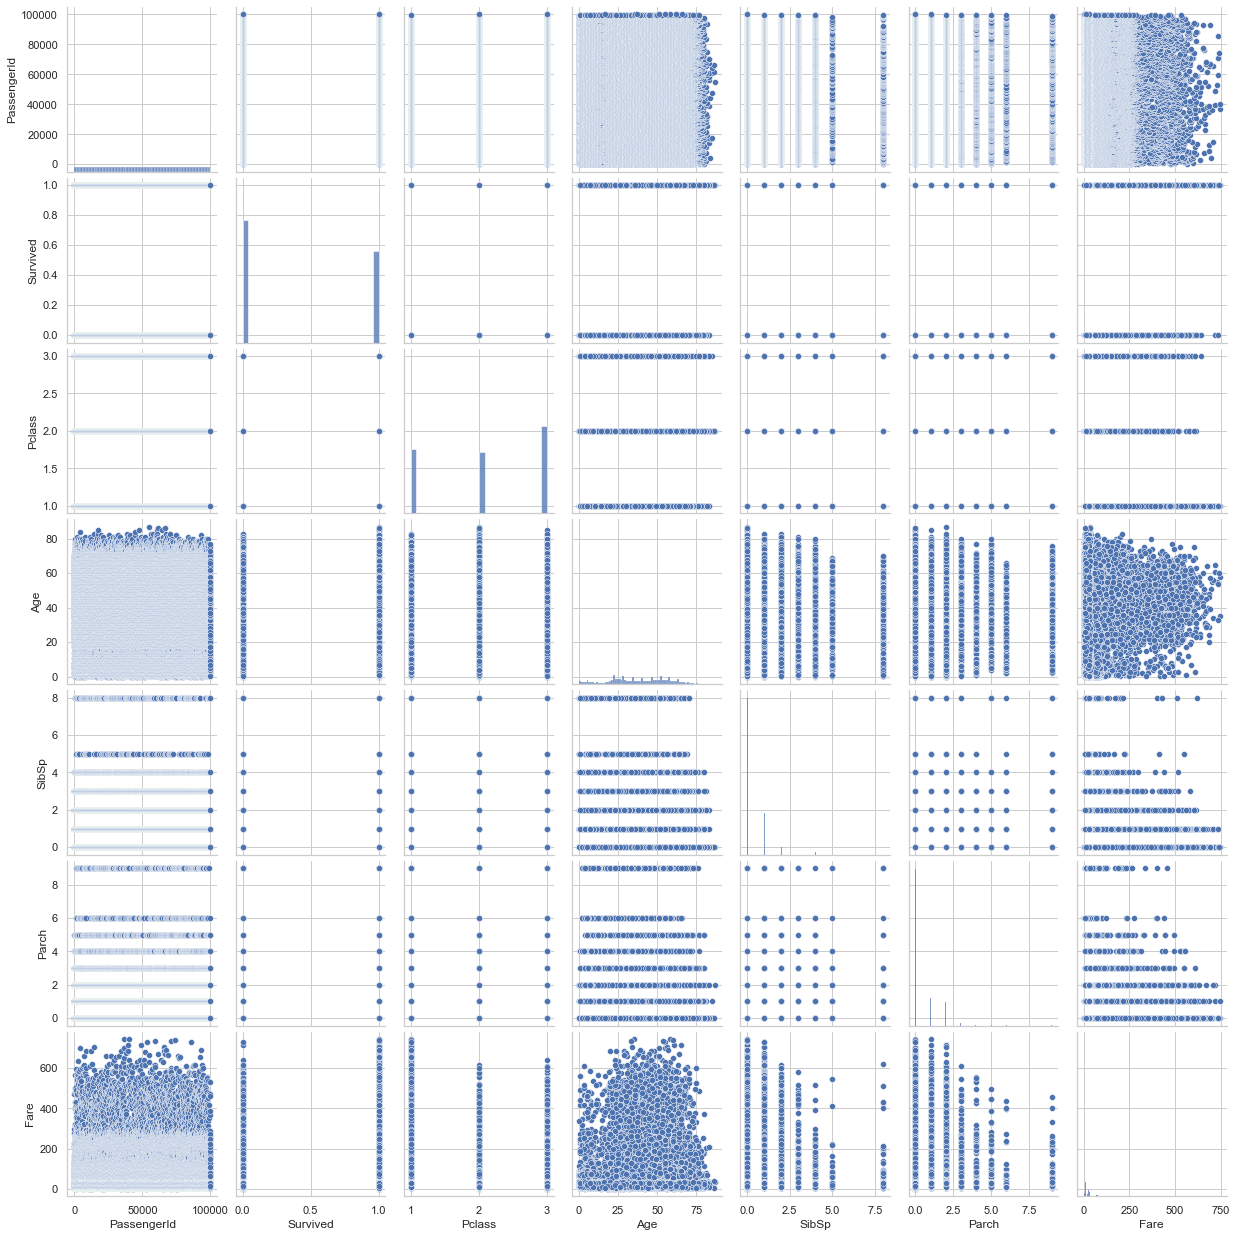

In [102]:
"""snc.displot(data_1['Age'])
snc.displot(data_1['Pclass'], bins=3)"""


# В общем
sns.pairplot(data_1)

# Далее работа с наиболее интересными

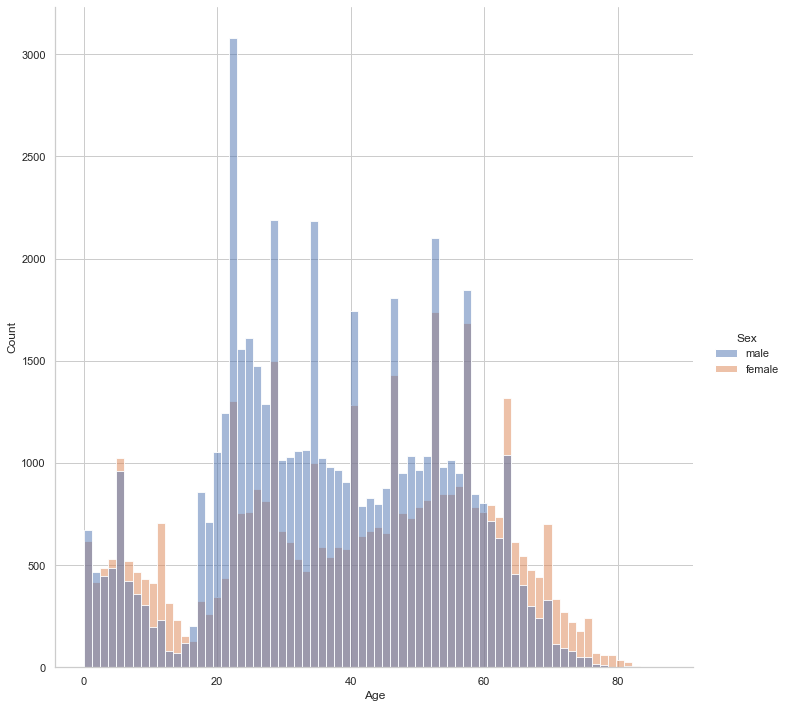

In [103]:
dsp = sns.displot(data=data_1, x='Age', hue='Sex', height=10)

In [104]:
"""
survival	Survival          0 = No, 1 = Yes
pclass	Ticket class          1 = 1st, 2 = 2nd, 3 = 3rd
sex                           Sex	                      ////
Age                           Age in years              ////
sibsp                         # of siblings / spouses aboard the Titanic	
parch                         # of parents / children aboard the Titanic	
ticket                        Ticket number         ////
fare                          Passenger fare	
cabin                         Cabin number	
embarked                      Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


возраст: Возраст дробный, если меньше 1. Если возраст оценивается, он в форме xx.5

sibsp: Набор данных определяет семейные отношения таким образом...
Брат, сестра, сводный брат, сводная сестра
Супруг = муж, жена (любовницы и женихи были проигнорированы)

parch: Набор данных определяет семейные отношения таким образом...
Родитель = мать, отец
Ребенок = дочь, сын, падчерица, пасынок
Некоторые дети путешествовали только с няней, поэтому parch=0 для них.
"""

'\nsurvival\tSurvival          0 = No, 1 = Yes\npclass\tTicket class          1 = 1st, 2 = 2nd, 3 = 3rd\nsex                           Sex\t                      ////\nAge                           Age in years              ////\nsibsp                         # of siblings / spouses aboard the Titanic\t\nparch                         # of parents / children aboard the Titanic\t\nticket                        Ticket number         ////\nfare                          Passenger fare\t\ncabin                         Cabin number\t\nembarked                      Port of Embarkation\tC = Cherbourg, Q = Queenstown, S = Southampton\n\n\nVariable Notes\npclass: A proxy for socio-economic status (SES)\n1st = Upper\n2nd = Middle\n3rd = Lower\n\nage: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5\n\nsibsp: The dataset defines family relations in this way...\nSibling = brother, sister, stepbrother, stepsister\nSpouse = husband, wife (mistresses and fiancés were

In [105]:
# Number of passengers in each class
data_1.groupby('Pclass')['Pclass'].count()

Pclass
1    30315
2    28679
3    41006
Name: Pclass, dtype: int64

In [106]:
# Number of men and women in each of the passenger class
data_1.groupby(['Sex', 'Pclass'])['Sex'].count()

Sex     Pclass
female  1         16084
        2         15283
        3         12519
male    1         14231
        2         13396
        3         28487
Name: Sex, dtype: int64

c:\users\сергей\desktop\rs school\course\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\сергей\desktop\rs school\course\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


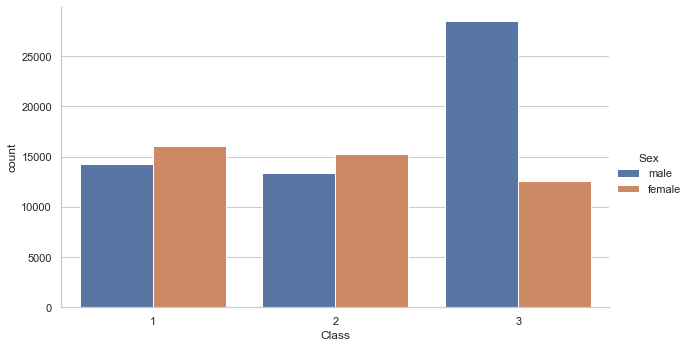

In [107]:
fg = sns.factorplot('Pclass', data=data_1, kind='count', aspect=1.75, hue='Sex')
fg.set_xlabels('Class')
# Распределение класса от колличества с учетом пола

56114 , 43886


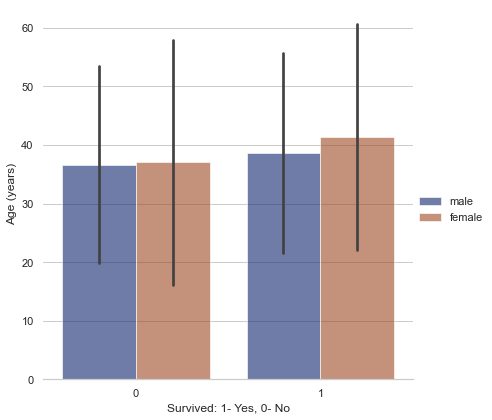

In [108]:
# счет женщин и мужчин
guy=0
women=0
for index, row in data_1.iterrows(): 
    row[4]=str(row[4])
    if row[4]== "male":
        guy=guy+1
    else:
        women=women+1
print(guy,',',women) #males / females


# Строим график
sns.set_theme(style="whitegrid")

penguins = data_1

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="Survived", y="Age", hue="Sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Survived: 1- Yes, 0- No", "Age (years)")
g.legend.set_title("")

In [109]:
# счет выживших
servived=0
non_servived=0
doly=0
for index, row in data_1.iterrows(): 
    row[1]=str(row[1])
    if row[1]== "1":
        servived=servived+1
    else:
        non_servived=non_servived+1
sum=servived+non_servived      
percent=round((servived*100)/sum)
print('Survived percent:', percent) 

Survived percent: 43


Доля первого класса: 30.32
Доля второго класса: 28.68
Доля третьего класса: 41.01
Максимальная цена за билет: 744.66


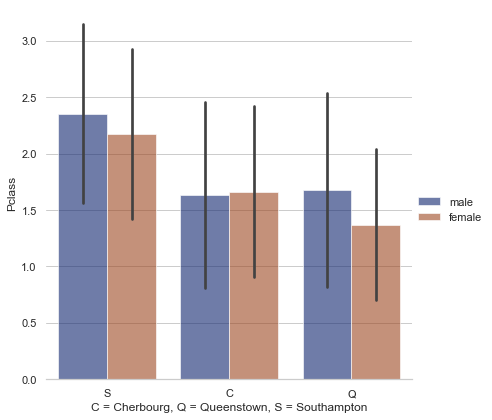

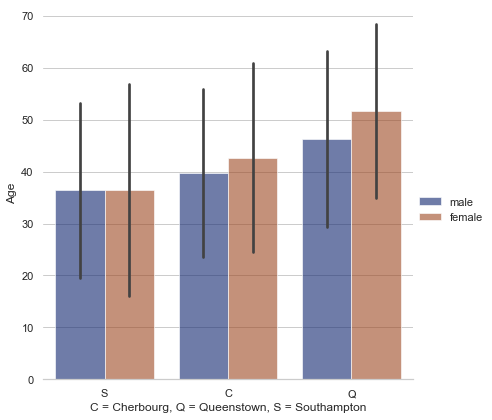

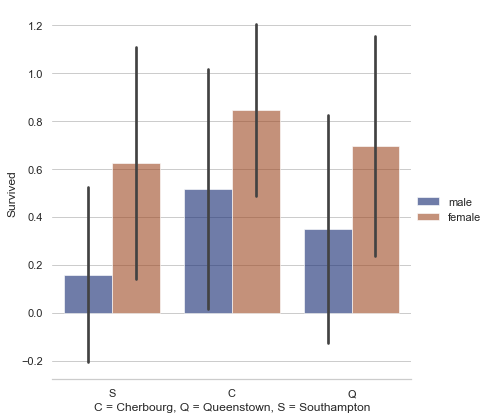

In [114]:
# счетт пассажиров различного класса
class1=0
class2=0
class3=0
class4=0
sum=0
doly=0

for index, row in data_1.iterrows(): 
    row[2]=str(row[2])
    
    if row[2]== "1":
        class1=class1+1 
    if row[2]== "2":
        class2=class2+1
    if row[2]== "3":
        class3=class3+1
    if row[2]== "4":
        class4=class4+1
    
sum=class1+class2+class3+class4
doly_1= round(class1*(100/sum),2)
print('Доля первого класса:', doly_1)  #доля первого класса
doly_2= round(class2*(100/sum),2)
print('Доля второго класса:', doly_2)  #доля второго класса
doly_3= round(class3*(100/sum),2)
print('Доля третьего класса:', doly_3)  #доля третьего класса


max_fare = data_1["Fare"].max()
print('Максимальная цена за билет:', max_fare)




# Строим график
sns.set_theme(style="whitegrid")

data = data_1

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=data, kind="bar",
    x="Embarked", y='Pclass', hue="Sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("C = Cherbourg, Q = Queenstown, S = Southampton")
g.legend.set_title("")
#___________________________________________________________________________


sns.set_theme(style="whitegrid")

data = data_1

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=data, kind="bar",
    x="Embarked", y='Age', hue="Sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("C = Cherbourg, Q = Queenstown, S = Southampton")
g.legend.set_title("")

#_____________________________________________________________________________
sns.set_theme(style="whitegrid")

data = data_1

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=data, kind="bar",
    x="Embarked", y='Survived', hue="Sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("C = Cherbourg, Q = Queenstown, S = Southampton")
g.legend.set_title("")

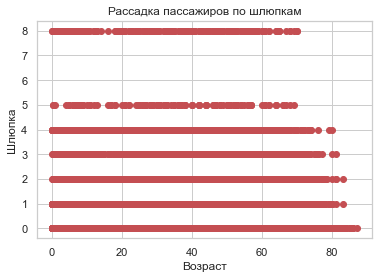

Выжило =  42.774 % Кол-во 42774
Не выжило =  57.226 % Кол-во 57226


In [111]:
survived=0
notsurvived=0
import matplotlib
from matplotlib.lines import Line2D 

data_2 = pd.read_csv('train.csv')
for index, row in data_1.iterrows(): 
    
    plt.plot(row[5], row[6], 'ro')
    
    row[1]=str(row[1])
    if row[1]== "1":
        survived=survived+1
    else:
        notsurvived=notsurvived+1
    
plt.grid(True)
plt.xlabel(u'Возраст')
plt.ylabel(u'Шлюпка')
plt.title(u'Рассадка пассажиров по шлюпкам')
plt.show()
sum=survived+notsurvived      
percent1=((survived*100)/sum)
percent2=100-percent1
print("Выжило = ",percent1,"%", "Кол-во", survived)
print("Не выжило = ",percent2,"%", "Кол-во",notsurvived)

In [115]:
b=data_1['Age'].mean()  #среднее
m=data_1['Age'].median()   #медиана
# print(round(b,2), m)
print('Среднее значение:', round(b,4))
print('Медиана:', m)

Среднее значение: 38.3555
Медиана: 39.0


In [ ]:
sns.set_theme(style="white")

df = data_1

g = sns.JointGrid(data=data, x="Age", y="Fare", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((1100, 3400), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)